In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [43]:
forecast_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\Output\arma\milk_iv\forecasts_milk_iv_(1, 1)_True_5.csv',parse_dates=True,index_col='asofdate')
pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\Output\arma\milk_iv\pnl.csv',parse_dates=True,index_col='asofdate')


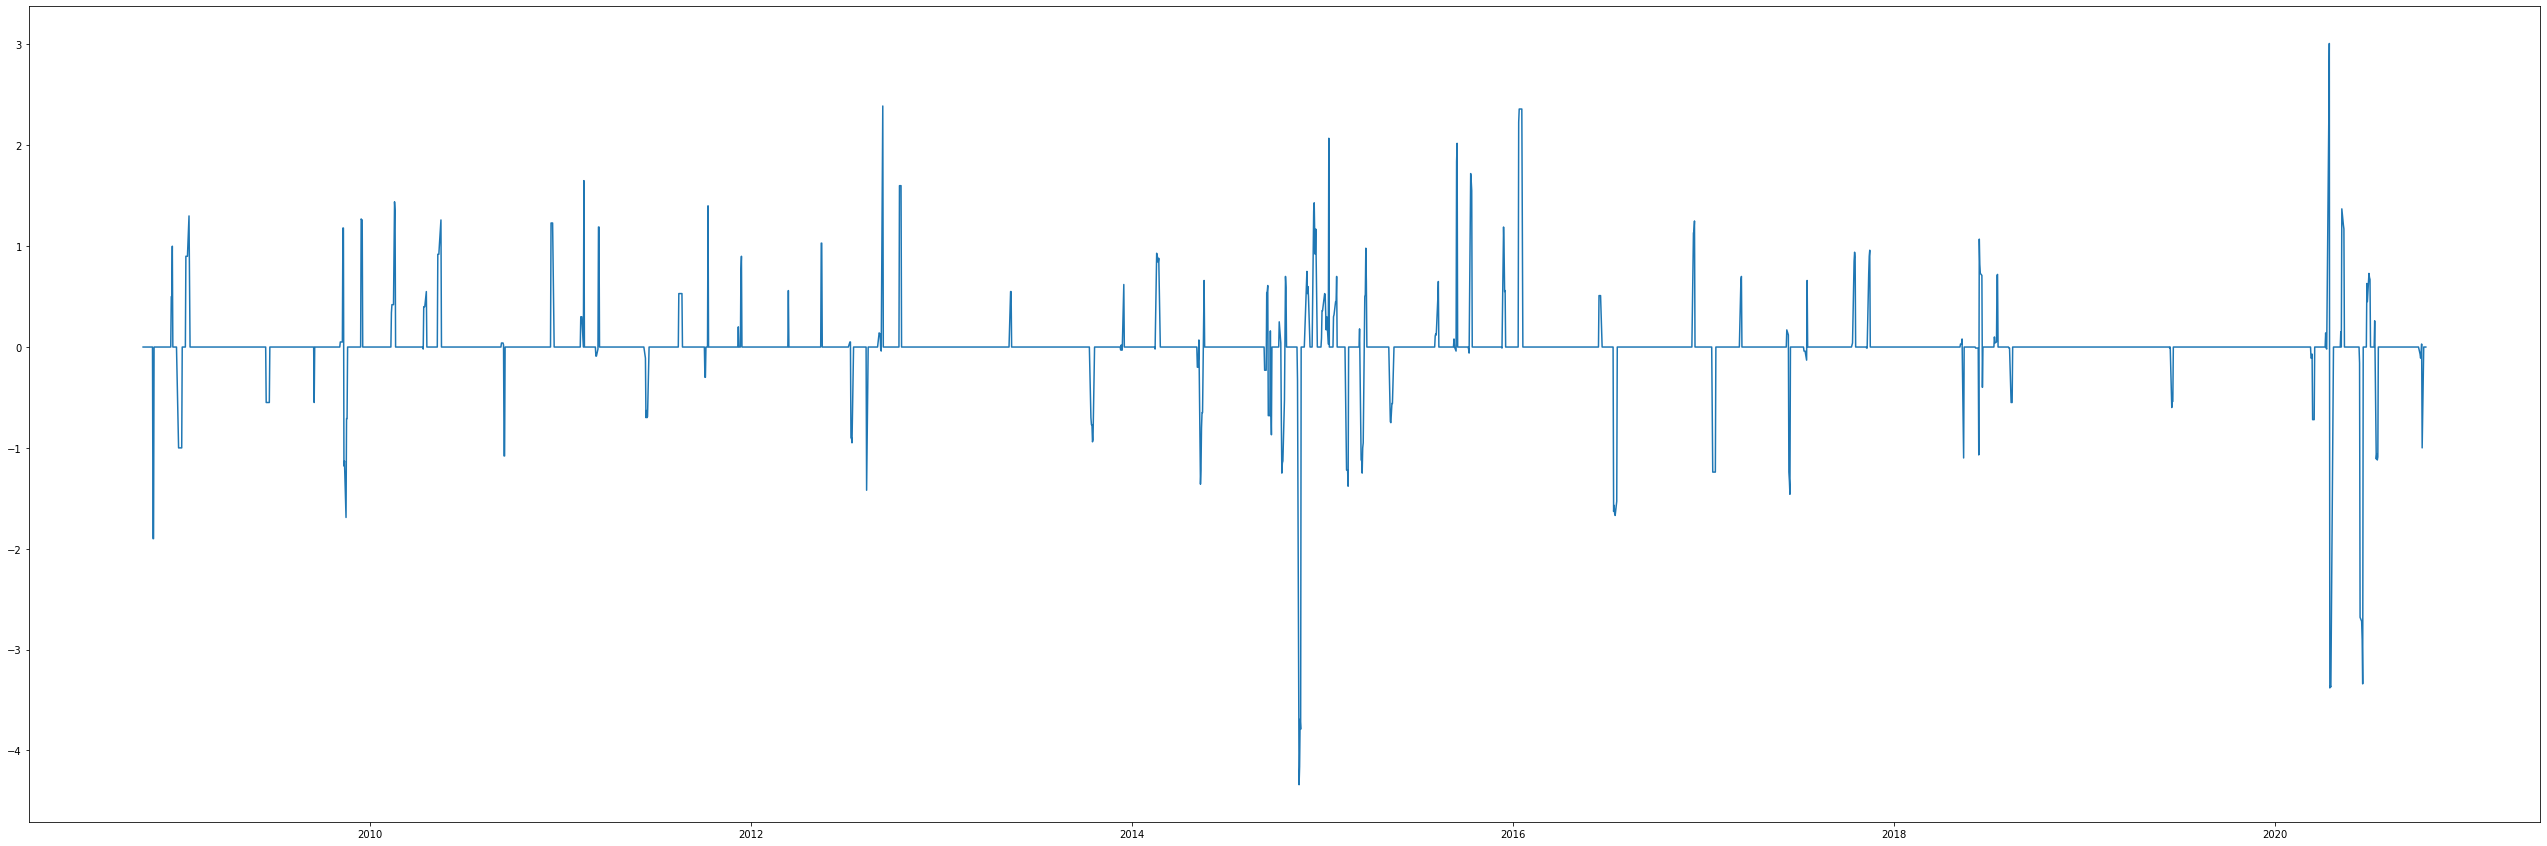

In [44]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'])

plt.show()

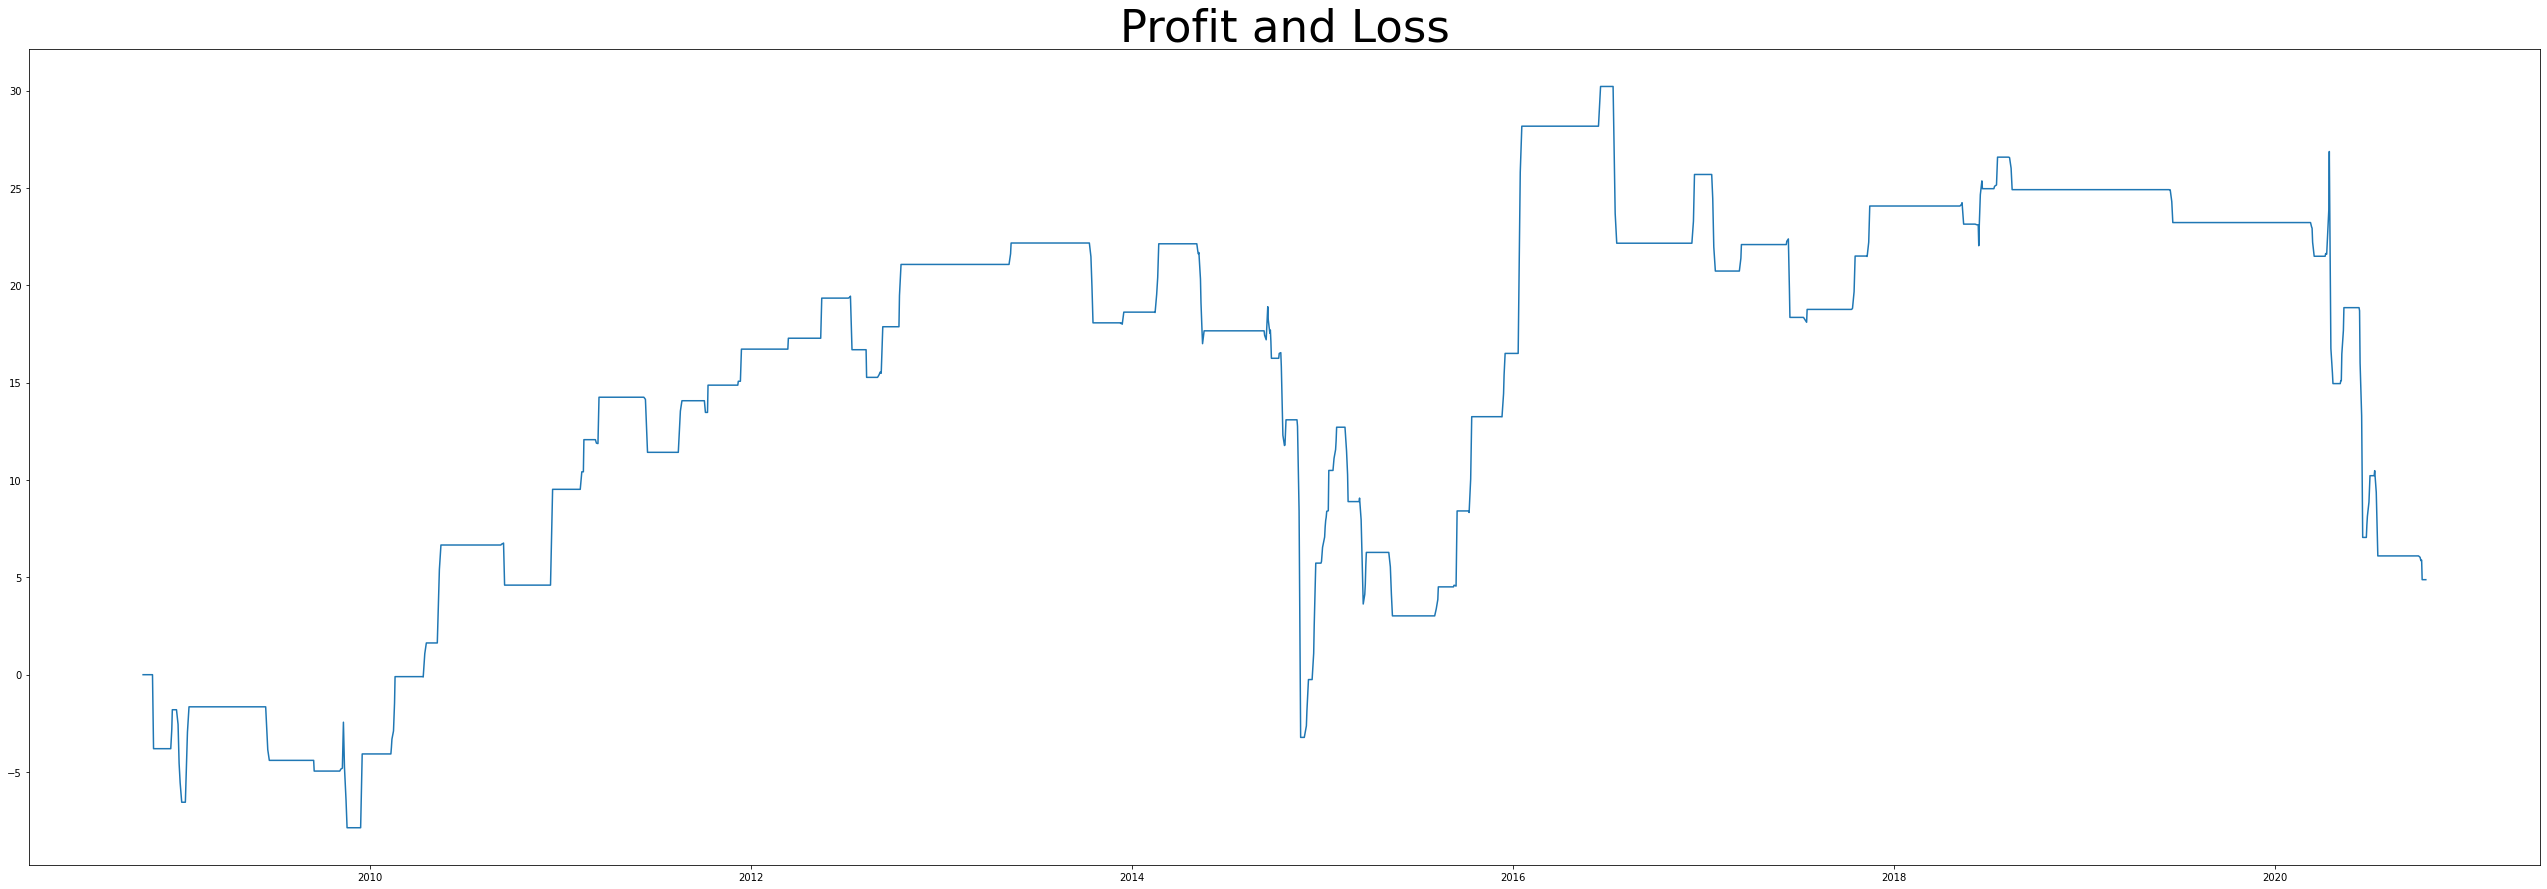

In [45]:
plt.figure(figsize=(45,15))

plt.title('Profit and Loss',fontsize=45)
plt.plot(pnl_df['pnl'].cumsum())
plt.show()

In [46]:
forecast_df

,Unnamed: 0,pointForecast,close,forecastday,product_name
asofdate,,,,,
2008-10-15 22:00:00+00:00,0,15.400000,15.40,1,milk_iv
2008-10-16 22:00:00+00:00,1,15.400000,15.40,2,milk_iv
2008-10-19 22:00:00+00:00,2,15.400000,15.40,3,milk_iv
2008-10-20 22:00:00+00:00,3,15.400000,15.40,4,milk_iv
2008-10-21 22:00:00+00:00,4,15.400000,15.40,5,milk_iv
...,...,...,...,...,...
2020-10-11 22:00:00+00:00,2995,13.432645,13.45,1,milk_iv
2020-10-12 22:00:00+00:00,2996,13.435041,13.46,2,milk_iv
2020-10-13 22:00:00+00:00,2997,13.436581,13.53,3,milk_iv


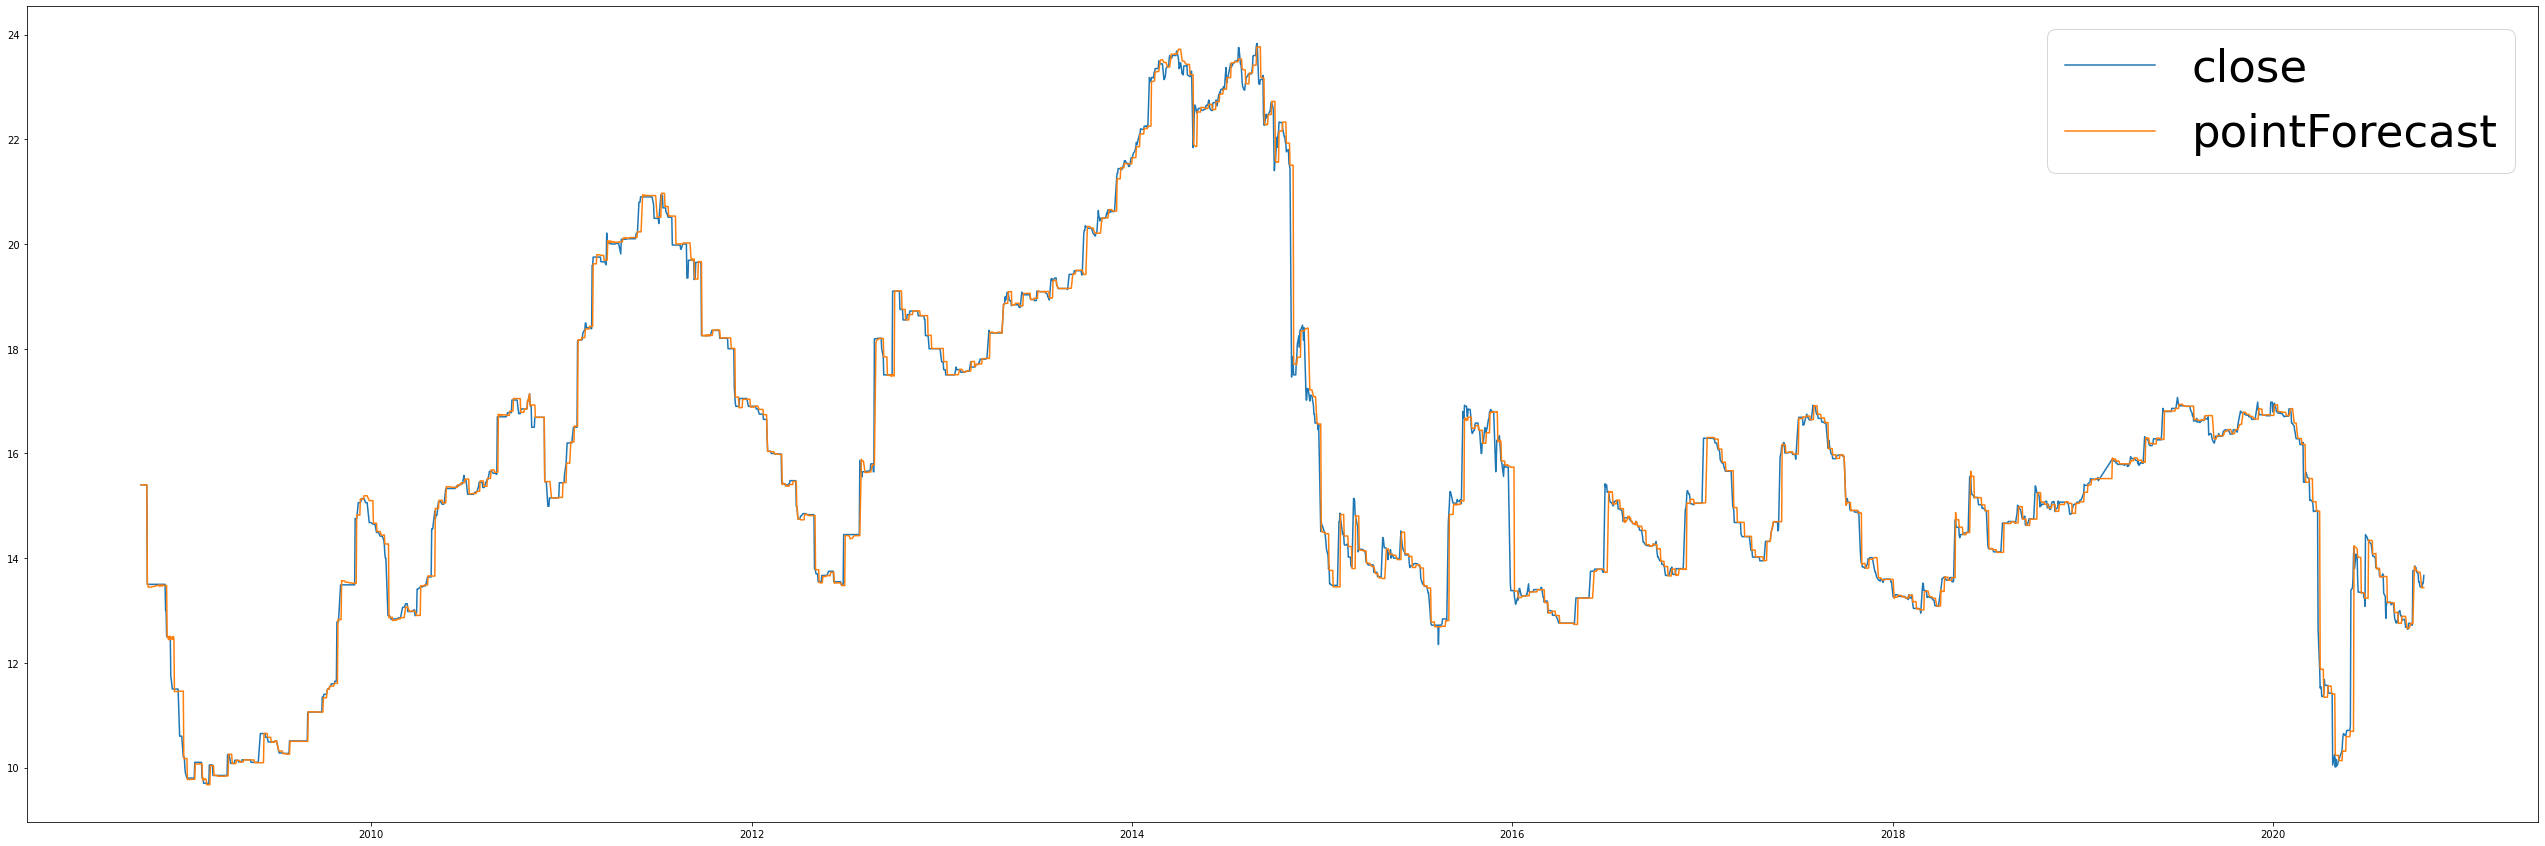

In [47]:
plt.figure(figsize=(45,15))

plt.plot(forecast_df['close'])
plt.plot(forecast_df['pointForecast'])

plt.legend(['close','pointForecast'],fontsize=45)

plt.show()